In [1]:
# reading the "MDFBPPK.pos" file using "ISO-8859-1" encoding

with open("./MDFBPPK.pos", "r", encoding="ISO-8859-1") as file:
    mdfbppk_content = file.readlines()

# Displaying the next 50 lines to get a better understanding of the data structure.
mdfbppk_content[10:30]


['% dynamics  : off\n',
 '% tidecorr  : on\n',
 '% ionos opt : off\n',
 '% tropo opt : off\n',
 '% ephemeris : broadcast\n',
 '% navi sys  : gps glonass\n',
 '% amb res   : fix and hold\n',
 '% amb glo   : on\n',
 '% val thres : 3.0\n',
 '% antenna1  :                       ( 0.0000  0.0000  0.0000)\n',
 '% antenna2  :                       ( 0.0000  0.0000  0.0000)\n',
 '% ref pos   : 36 00 00.33324  120 07 00.12751    66.4789\n',
 '%\n',
 '% (lat/lon/height=WGS84/ellipsoidal,Q=1:fix,2:float,3:sbas,4:dgps,5:single,6:ppp,ns=# of satellites)\n',
 '%  UTC                  latitude(d\'")   longitude(d\'")  height(m)   Q  ns   sdn(m)   sde(m)   sdu(m)  sdne(m)  sdeu(m)  sdue(m) age(s)  ratio\n',
 '2019/03/30 23:59:42   36 02 29.88428  120 24 09.14656     5.9600   1   8   0.0030   0.0027   0.0093   0.0008  -0.0012   0.0024   0.00   10.1\n',
 '2019/03/30 23:59:43   36 02 29.91526  120 24 09.29198     5.9461   1   8   0.0063   0.0053   0.0169  -0.0011   0.0020   0.0051  -9.00    9.9\n',
 '201

In [2]:
import datetime
import matplotlib.pyplot as plt

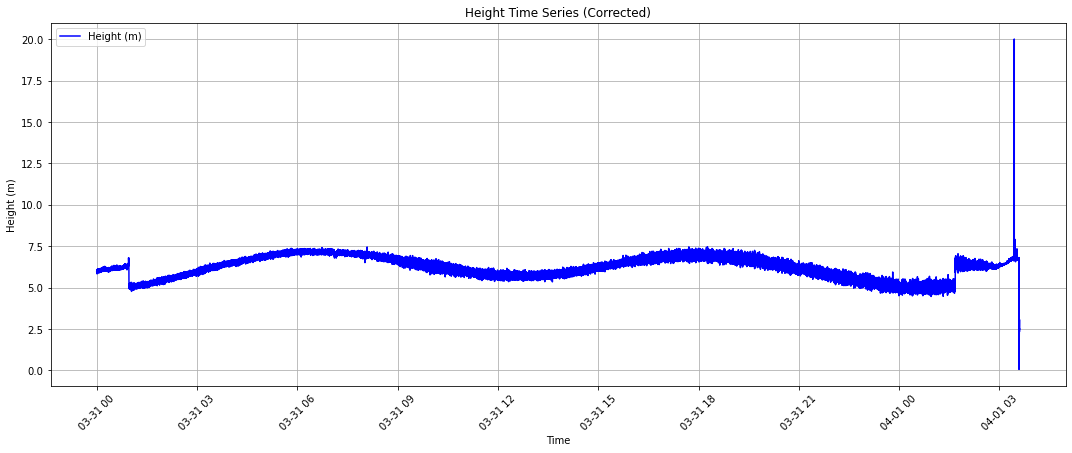

In [3]:
# Extracting the correct height data based on the new format provided
# Also converting latitude and longitude from degrees, minutes, and seconds to decimal degrees

def dms_to_decimal(deg, minutes, seconds):
    """Convert degrees, minutes, seconds to decimal format."""
    return deg + minutes / 60 + seconds / 3600

time_data_new = []
latitude_data = []
longitude_data = []
height_data_new = []

for line in mdfbppk_content[15:]:
    try:
        parts = line.split()
        time_str = parts[0] + " " + parts[1]
        time = datetime.datetime.strptime(time_str, "%Y/%m/%d %H:%M:%S")
        
        # Convert latitude from DMS to decimal
        lat_deg = float(parts[2])
        lat_min = float(parts[3])
        lat_sec = float(parts[4])
        latitude = dms_to_decimal(lat_deg, lat_min, lat_sec)
        
        # Convert longitude from DMS to decimal
        lon_deg = float(parts[5])
        lon_min = float(parts[6])
        lon_sec = float(parts[7])
        longitude = dms_to_decimal(lon_deg, lon_min, lon_sec)
        
        height = float(parts[8])
        
        time_data_new.append(time)
        latitude_data.append(latitude)
        longitude_data.append(longitude)
        height_data_new.append(height)
    except:
        continue

# Plotting the height data again
plt.figure(figsize=(15, 6))
plt.plot(time_data_new, height_data_new, label="Height (m)", color="blue")
plt.xlabel("Time")
plt.ylabel("Height (m)")
plt.title("Height Time Series (Corrected)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


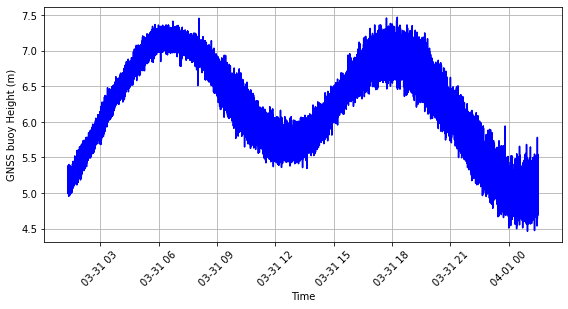

In [4]:
# Adjusting the time range based on the new provided information: from 3-31 01:00 to 4-1 01:00
start_time_adjusted = datetime.datetime(year=2019, month=3, day=31, hour=1, minute=20, second=0)
end_time_adjusted = datetime.datetime(year=2019, month=4, day=1, hour=1, minute=30, second=0)

filtered_time_data_adjusted = [time for time in time_data_new if start_time_adjusted <= time <= end_time_adjusted]
filtered_height_data_adjusted = [height_data_new[i] for i, time in enumerate(time_data_new) if start_time_adjusted <= time <= end_time_adjusted]

# Plotting the adjusted filtered data
plt.figure(figsize=(8, 4))
plt.plot(filtered_time_data_adjusted, filtered_height_data_adjusted, color="blue")
plt.xlabel("Time")
plt.ylabel("GNSS buoy Height (m)")
# plt.title("Height Time Series (Adjusted Filtered)")
plt.grid(True)
# plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
# plt.savefig("./ssh_G2.pdf", format="pdf")
plt.show()


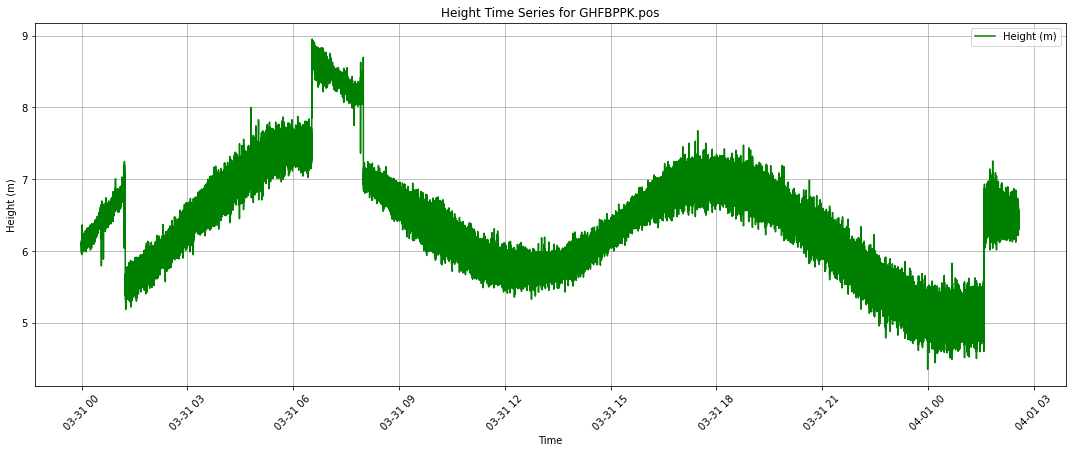

In [6]:
# Let's read the first few lines of the file "GHFBPPK.pos" using the encoding "ISO-8859-1" (as used for the previous file) 
# to understand its structure and content.
with open("./GHFBPPK.pos", "r", encoding="ISO-8859-1") as file:
    ghfbppk_content = file.readlines()
    
# Extracting the UTC and height data from the "GHFBPPK.pos" file

time_data_gh = []
height_data_gh = []

for line in ghfbppk_content[15:]:
    try:
        parts = line.split()
        time_str = parts[0] + " " + parts[1]
        time = datetime.datetime.strptime(time_str, "%Y/%m/%d %H:%M:%S")
        
        # Convert latitude from DMS to decimal
        lat_deg = float(parts[2])
        lat_min = float(parts[3])
        lat_sec = float(parts[4])
        latitude = dms_to_decimal(lat_deg, lat_min, lat_sec)
        
        # Convert longitude from DMS to decimal
        lon_deg = float(parts[5])
        lon_min = float(parts[6])
        lon_sec = float(parts[7])
        longitude = dms_to_decimal(lon_deg, lon_min, lon_sec)
        
        height = float(parts[8])
        
        time_data_gh.append(time)
        height_data_gh.append(height)
    except:
        continue

# Plotting the height data for "GHFBPPK.pos"
plt.figure(figsize=(15, 6))
plt.plot(time_data_gh, height_data_gh, label="Height (m)", color="green")
plt.xlabel("Time")
plt.ylabel("Height (m)")
plt.title("Height Time Series for GHFBPPK.pos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



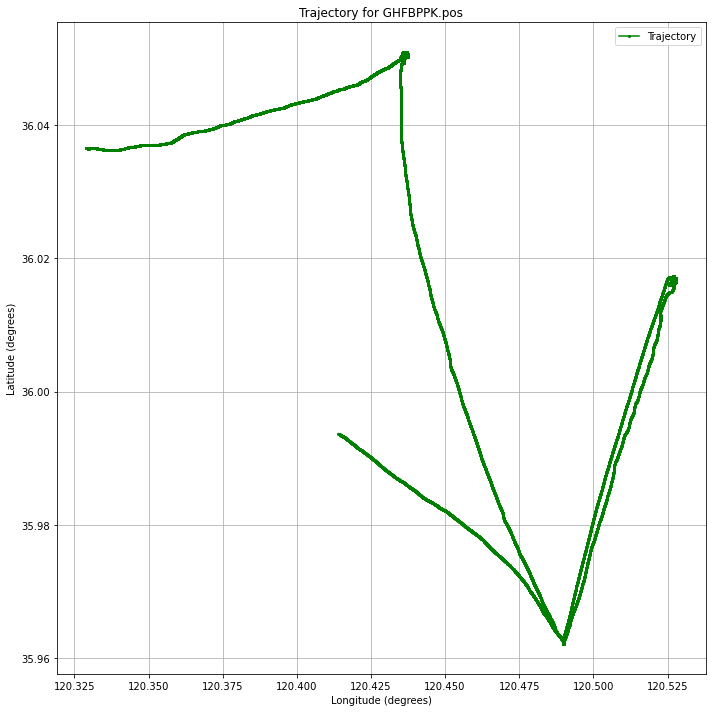

In [7]:
# Extracting the latitude and longitude data from the "GHFBPPK.pos" file and plotting the trajectory

latitude_data_gh = []
longitude_data_gh = []

for line in ghfbppk_content[15:]:
    try:
        parts = line.split()
        
        # Convert latitude from DMS to decimal
        lat_deg = float(parts[2])
        lat_min = float(parts[3])
        lat_sec = float(parts[4])
        latitude = dms_to_decimal(lat_deg, lat_min, lat_sec)
        
        # Convert longitude from DMS to decimal
        lon_deg = float(parts[5])
        lon_min = float(parts[6])
        lon_sec = float(parts[7])
        longitude = dms_to_decimal(lon_deg, lon_min, lon_sec)
        
        latitude_data_gh.append(latitude)
        longitude_data_gh.append(longitude)
    except:
        continue

# Plotting the trajectory for "GHFBPPK.pos"
plt.figure(figsize=(10, 10))
plt.plot(longitude_data_gh, latitude_data_gh, label="Trajectory", color="green", marker='o', markersize=2, linestyle='-')
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.title("Trajectory for GHFBPPK.pos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


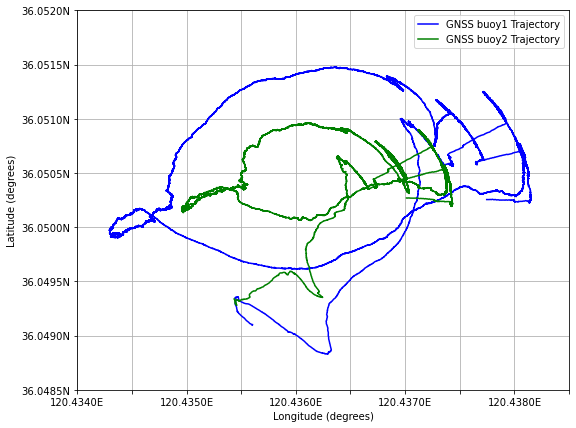

In [18]:
# Updating the time range based on the new provided information: from 3-31 09:00 to 4-1 00:00
start_time_adjusted = datetime.datetime(year=2019, month=3, day=31, hour=8, minute=0, second=0)
end_time_adjusted = datetime.datetime(year=2019, month=4, day=1, hour=1, minute=30, second=0)

# Re-filtering the trajectories for MDFBPPK.pos based on the updated time range
filtered_latitude_data_md_time_updated = [latitude_data[i] for i, time in enumerate(time_data_new) if start_time_adjusted <= time <= end_time_adjusted]
filtered_longitude_data_md_time_updated = [longitude_data[i] for i, time in enumerate(time_data_new) if start_time_adjusted <= time <= end_time_adjusted]

# Re-filtering the trajectories for GHFBPPK.pos based on the updated time range
filtered_latitude_data_gh_time_updated = [latitude_data_gh[i] for i, time in enumerate(time_data_gh) if start_time_adjusted <= time <= end_time_adjusted]
filtered_longitude_data_gh_time_updated = [longitude_data_gh[i] for i, time in enumerate(time_data_gh) if start_time_adjusted <= time <= end_time_adjusted]

# Downsampling the data by taking every 300th point
downsampled_latitude_data_md = filtered_latitude_data_md_time_updated[::1]
downsampled_longitude_data_md = filtered_longitude_data_md_time_updated[::1]
downsampled_latitude_data_gh = filtered_latitude_data_gh_time_updated[::1]
downsampled_longitude_data_gh = filtered_longitude_data_gh_time_updated[::1]

# Plotting both downsampled trajectories within the updated time range
plt.figure(figsize=(8, 6))
plt.plot(downsampled_longitude_data_md, downsampled_latitude_data_md, label="GNSS buoy1 Trajectory", color="blue", linestyle='-')
plt.plot(downsampled_longitude_data_gh, downsampled_latitude_data_gh, label="GNSS buoy2 Trajectory", color="green", linestyle='-')
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
# plt.title("Downsampled Trajectories for MDFBPPK.pos and GHFBPPK.pos (Updated Time Range)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Modify tick labels to include 'N' for latitude and 'E' for longitude
plt.yticks(ticks=plt.yticks()[0], labels=[f"{lat:.4f}N" for lat in plt.yticks()[0]])
# plt.xticks(ticks=plt.xticks()[0], labels=[f"{lon:.4f}E" for lon in plt.xticks()[0]])

# 获取当前的x轴刻度
current_xticks = plt.xticks()[0]

# 选择每两个刻度
selected_xticks_labels = current_xticks[::2]

# 创建一个新的标签列表，其中只有每两个刻度的位置有标签，其他位置为空字符串
new_xtick_labels = [f"{lon:.4f}E" if lon in selected_xticks_labels else '' for lon in current_xticks]

# 设置新的x轴标签
plt.xticks(ticks=current_xticks, labels=new_xtick_labels)

plt.savefig("./trajectories_time_adjusted_plot2.pdf", format="pdf")
plt.show()

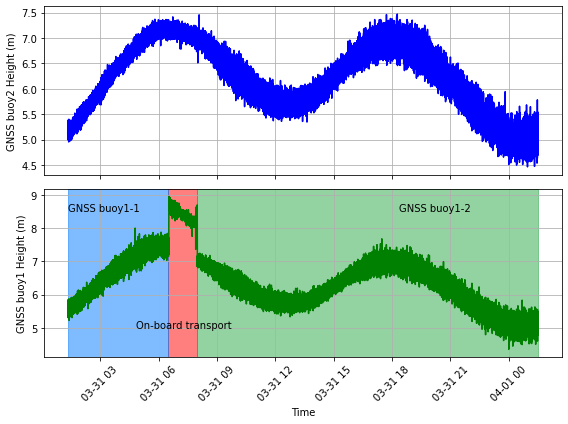

In [9]:
# Adjusting the time range based on the new provided information: from 3-31 01:00 to 4-1 01:00
start_time_adjusted = datetime.datetime(year=2019, month=3, day=31, hour=1, minute=20, second=0)
end_time_adjusted = datetime.datetime(year=2019, month=4, day=1, hour=1, minute=30, second=0)

filtered_time_data_adjusted_md = [time for time in time_data_new if start_time_adjusted <= time <= end_time_adjusted]
filtered_height_data_adjusted_md = [height_data_new[i] for i, time in enumerate(time_data_new) if start_time_adjusted <= time <= end_time_adjusted]

filtered_time_data_adjusted_gh = [time for time in time_data_gh if start_time_adjusted <= time <= end_time_adjusted]
filtered_height_data_adjusted_gh = [height_data_gh[i] for i, time in enumerate(time_data_gh) if start_time_adjusted <= time <= end_time_adjusted]

# Plotting the adjusted filtered data for both buoys in two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plotting MDFBPPK.pos data
axes[0].plot(filtered_time_data_adjusted_md, filtered_height_data_adjusted_md, color="blue")
axes[0].set_ylabel("GNSS buoy2 Height (m)")
axes[0].grid(True)
axes[0].set_xticklabels([])  # Hide X-axis time labels for the top plot but retain the grid


# Plotting GHFBPPK.pos data
axes[1].plot(filtered_time_data_adjusted_gh, filtered_height_data_adjusted_gh, color="green")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("GNSS buoy1 Height (m)")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Define the time range for the annotation
start_annotation = datetime.datetime(year=2019, month=3, day=31, hour=6, minute=30, second=0)
end_annotation = datetime.datetime(year=2019, month=3, day=31, hour=8, minute=00, second=0)

# Adding a pink background for the specific time range on the lower subplot (GHFBPPK.pos data)
axes[1].axvspan(start_annotation, end_annotation, color='#FF0000', alpha=0.5)  # alpha is for transparency

# Define new position for the annotation text
end_annotation = datetime.datetime(year=2019, month=3, day=31, hour=4, minute=50, second=0)
annotation_position = (end_annotation, 5)  # Positioned at 08:20 and Y=8.5

# Adding the annotation text on the lower subplot
axes[1].text(annotation_position[0], annotation_position[1], 'On-board transport', color='black', horizontalalignment='left')  # Text will start from 08:20

# Define the time range for the annotation
start_annotation = datetime.datetime(year=2019, month=3, day=31, hour=1, minute=20, second=0)
end_annotation = datetime.datetime(year=2019, month=3, day=31, hour=6, minute=30, second=0)

# Adding a pink background for the specific time range on the lower subplot (GHFBPPK.pos data)
axes[1].axvspan(start_annotation, end_annotation, color='#007BFF', alpha=0.5)  # alpha is for transparency

# Define the time range for the annotation
start_annotation = datetime.datetime(year=2019, month=3, day=31, hour=8, minute=00, second=0)
end_annotation = datetime.datetime(year=2019, month=4, day=1, hour=1, minute=30, second=0)

# Adding a pink background for the specific time range on the lower subplot (GHFBPPK.pos data)
axes[1].axvspan(start_annotation, end_annotation, color='#28A745', alpha=0.5)  # alpha is for transparency

# Define new position for the annotation text
end_annotation = datetime.datetime(year=2019, month=3, day=31, hour=1, minute=20, second=0)
annotation_position = (end_annotation, 8.5)  # Positioned at 08:20 and Y=8.5

# Adding the annotation text on the lower subplot
axes[1].text(annotation_position[0], annotation_position[1], 'GNSS buoy1-1', color='black', horizontalalignment='left')  # Text will start from 08:20

# Define new position for the annotation text
end_annotation = datetime.datetime(year=2019, month=3, day=31, hour=18, minute=20, second=0)
annotation_position = (end_annotation, 8.5)  # Positioned at 08:20 and Y=8.5

# Adding the annotation text on the lower subplot
axes[1].text(annotation_position[0], annotation_position[1], 'GNSS buoy1-2', color='black', horizontalalignment='left')  # Text will start from 08:20

plt.tight_layout()
plt.savefig("./ssh_G2.pdf", format="pdf")
plt.show()


In [10]:
# Adjusting the time range based on the provided information: from 3-31 01:20 to 4-1 01:30
start_time = datetime.datetime(year=2019, month=3, day=31, hour=1, minute=20, second=0)
end_time = datetime.datetime(year=2019, month=4, day=1, hour=1, minute=30, second=0)

# Filtering data for MDFBPPK
filtered_time_data_mdf = [time for time in time_data_new if start_time <= time <= end_time]
filtered_latitude_data_mdf = [latitude_data[i] for i, time in enumerate(time_data_new) if start_time <= time <= end_time]
filtered_longitude_data_mdf = [longitude_data[i] for i, time in enumerate(time_data_new) if start_time <= time <= end_time]
filtered_height_data_mdf = [height_data_new[i] for i, time in enumerate(time_data_new) if start_time <= time <= end_time]

# Filtering data for GHFBPPK
filtered_time_data_gh = [time for time in time_data_gh if start_time <= time <= end_time]
filtered_latitude_data_gh = [latitude_data_gh[i] for i, time in enumerate(time_data_gh) if start_time <= time <= end_time]
filtered_longitude_data_gh = [longitude_data_gh[i] for i, time in enumerate(time_data_gh) if start_time <= time <= end_time]
filtered_height_data_gh = [height_data_gh[i] for i, time in enumerate(time_data_gh) if start_time <= time <= end_time]

# filtered_time_data_mdf, filtered_latitude_data_mdf, filtered_longitude_data_mdf, filtered_height_data_mdf, filtered_time_data_gh, filtered_latitude_data_gh, filtered_longitude_data_gh, filtered_height_data_gh


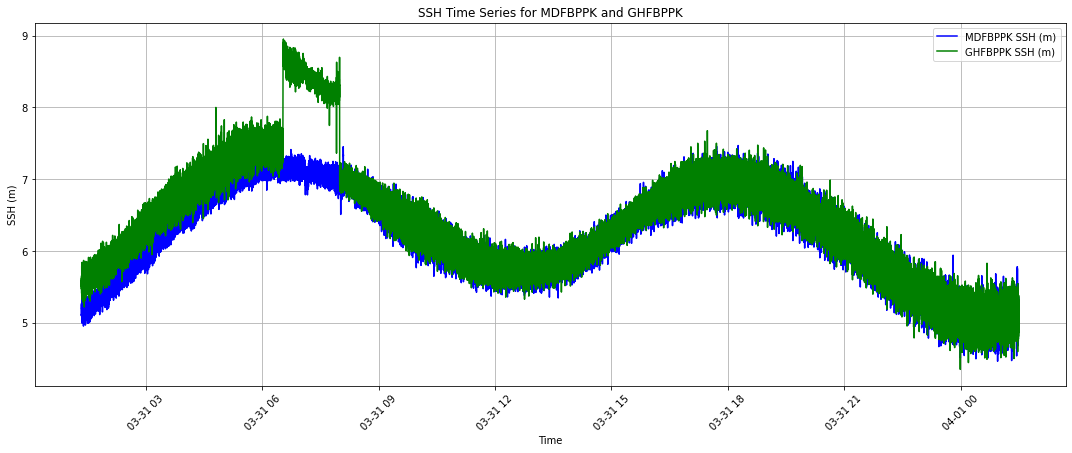

In [11]:
# Plotting the SSH time series for both datasets on a single graph
plt.figure(figsize=(15, 6))

# Plotting for MDFBPPK
plt.plot(filtered_time_data_mdf, filtered_height_data_mdf, label="MDFBPPK SSH (m)", color="blue")

# Plotting for GHFBPPK
plt.plot(filtered_time_data_gh, filtered_height_data_gh, label="GHFBPPK SSH (m)", color="green")

# Setting labels, title, and other properties
plt.xlabel("Time")
plt.ylabel("SSH (m)")
plt.title("SSH Time Series for MDFBPPK and GHFBPPK")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [12]:
from geopy.distance import geodesic
import numpy as np
point1 = (36, 120)  # Los Angeles
point2 = (37, 120)  # Some place in California

distance = geodesic(point1, point2).meters
distance

110968.30443995602

In [13]:
from geopy.distance import geodesic
import numpy as np
point1 = (36, 120)  # Los Angeles
point2 = (36, 121)  # Some place in California

distance = geodesic(point1, point2).meters
distance

90163.29243613624

In [14]:
from geopy.distance import geodesic
import numpy as np
point1 = (36.017094262, 120.527263443)  # Los Angeles
point2 = (36.017094314, 120.527266604)  # Some place in California

distance = geodesic(point1, point2).meters
distance

0.2850043082365223

In [27]:
import math

A = 6378137.0
B = 6356752.314245


def blh2xyz(latitude, longitude, height):
    """Convert BLH coordinates to XYZ.
    return tuple(X, Y, Z).

    Example 1, convert BJFS(Beijing, China) BLH to XYZ:

    XYZ position calculated by TEQC software:
    - X: -2148748
    - Y: 4426656
    - Z: 4044670

    >>> x, y, z = blh2xyz(39.608611, 115.892456, 108.0420)
    >>> round(x), round(y), round(z)
    (-2148748, 4426656, 4044670)

    Example 2, convert BOGT(Bogota, Colombia) BLH to XYZ:

    XYZ position calculated by TEQC software:
    - X: 1744394
    - Y: -6116025
    - Z: 512728

    >>> x, y, z = blh2xyz(4.640045, -74.080950, 2563.1791)
    >>> round(x), round(y), round(z)
    (1744394, -6116025, 512728)
    """
    # convert angle unit to radians
    latitude = math.radians(latitude)
    longitude = math.radians(longitude)

    e = math.sqrt(1 - (B**2)/(A**2))
    N = A / math.sqrt(1 - e**2 * math.sin(latitude)**2)
    # calculate X, Y, Z
    X = (N + height) * math.cos(latitude) * math.cos(longitude)
    Y = (N + height) * math.cos(latitude) * math.sin(longitude)
    Z = (N * (1 - e**2) + height) * math.sin(latitude)

    return X, Y, Z


def xyz2blh(x, y, z):
    """Convert XYZ coordinates to BLH,
    return tuple(latitude, longitude, height).

    Example 1, convert BJFS(Beijing, China) XYZ to BLH:

    BLH position calculated by TEQC software:
    - latitute: 39.6086
    - longitude: 115.8928
    - height: 112.78
    >>> lat, lon, hgt = xyz2blh(-2148778.283, 4426643.490, 4044675.194)
    >>> round(lat, 4), round(lon, 4), round(hgt, 2)
    (39.6086, 115.8928, 112.78)

    Example 2, convert BOGT(Bogota, Colombia) XYZ to BLH:

    BLH position calculated by TEQC software:
    - latitute: 4.6401
    - longitude: -74.0806
    - height: 2585.69
    >>> lat, lon, hgt = xyz2blh(1744433.521, -6116034.660, 512736.584)
    >>> round(lat, 4), round(lon, 4), round(hgt, 2)
    (4.6401, -74.0806, 2585.69)
    """
    e = math.sqrt(1 - (B**2)/(A**2))
    # calculate longitude, in radians
    if x >= 0:
        longitude = math.atan(y/x)
    elif y >= 0:
        longitude = math.pi + math.atan(y/x)
    else:
        longitude = -math.pi + math.atan(y/x)
    # calculate latitude, in radians
    xy_hypot = math.hypot(x, y)

    lat0 = 0
    latitude = math.atan(z / xy_hypot)

    while abs(latitude - lat0) > 1E-9:
        lat0 = latitude
        N = A / math.sqrt(1 - e**2 * math.sin(lat0)**2)
        latitude = math.atan((z + e**2 * N * math.sin(lat0)) / xy_hypot)
    # calculate height, in meters
    height = z / math.sin(latitude) - N * (1 - e**2)
    # convert angle unit to degrees
    longitude = math.degrees(longitude)
    latitude = math.degrees(latitude)

    return latitude, longitude, height


def xyz2neu(x0, y0, z0, x, y, z):
    """Convert cartesian coordinate system to site-center system.

    Input paraments:
    - x0, y0, z0: coordinate of centra site,
    - x, y, z: coordinate to be converted.

    Example: Use coordinate of BJFS IGS site
    >>> north, east, up = xyz2neu(-2148747.998, 4426652.444, 4044675.151,
    ... -2148745.727, 4426649.545, 4044668.469)
    >>> round(north, 2), round(east, 2), round(up, 2)
    (-2.85, -0.78, -7.03)
    """
    # calculate the lat, lon and height of center site
    lat, lon, _ = xyz2blh(x0, y0, z0)
    # convert angle unit to radians
    lat, lon = math.radians(lat), math.radians(lon)
    # calculate NEU
    north = (-math.sin(lat) * math.cos(lon) * (x - x0) -
             math.sin(lat) * math.sin(lon) * (y - y0) +
             math.cos(lat) * (z - z0))
    east = -math.sin(lon) * (x - x0) + math.cos(lon) * (y - y0)
    up = (math.cos(lat) * math.cos(lon) * (x - x0) +
          math.cos(lat) * math.sin(lon) * (y - y0) +
          math.sin(lat) * (z - z0))

    return north, east, up


In [24]:
# Downsampling the data by taking every 300th point
downsampled_latitude_data_md = filtered_latitude_data_md_time_updated[::1]
downsampled_longitude_data_md = filtered_longitude_data_md_time_updated[::1]
downsampled_latitude_data_gh = filtered_latitude_data_gh_time_updated[::1]
downsampled_longitude_data_gh = filtered_longitude_data_gh_time_updated[::1]
# 获取数组大小
size_of_downsampled_longitude_data_gh = len(downsampled_longitude_data_gh)

# 显示数组大小
print("Size of downsampled_longitude_data_gh:", size_of_downsampled_longitude_data_gh)


Size of downsampled_longitude_data_gh: 84675


In [29]:
# 定义高度为0
height = 0

# 对第一套设备的数据进行转换
xyz_data_md = [blh2xyz(lat, lon, height) for lat, lon in zip(downsampled_latitude_data_md, downsampled_longitude_data_md)]

# 对第二套设备的数据进行转换
xyz_data_gh = [blh2xyz(lat, lon, height) for lat, lon in zip(downsampled_latitude_data_gh, downsampled_longitude_data_gh)]

# 输出一些结果作为示例
print("First few XYZ coordinates for MD device:", xyz_data_md[:5])
print("First few XYZ coordinates for GH device:", xyz_data_gh[:5])


First few XYZ coordinates for MD device: [(-2615314.9039892387, 4451356.492706478, 3732598.0639392296), (-2615314.9125935445, 4451356.700546948, 3732597.811747342), (-2615314.983260859, 4451356.764002916, 3732597.687395805), (-2615315.0487256334, 4451356.849238585, 3732597.5408653338), (-2615315.0379947643, 4451356.952524483, 3732597.4259834485)]
First few XYZ coordinates for GH device: [(-2615294.0375172906, 4451350.835025977, 3732619.2883966155), (-2615294.095167826, 4451350.908444468, 3732619.1613042434), (-2615294.156818554, 4451350.885897119, 3732619.1451061955), (-2615294.2259181337, 4451350.980778835, 3732618.9846209227), (-2615294.2838999126, 4451351.05673754, 3732618.854288935)]


In [76]:
# 提取 xyz_data_md 和 xyz_data_gh 第一个点的坐标作为参考点
reference_x_md, reference_y_md, reference_z_md = xyz_data_md[0]
reference_x_gh, reference_y_gh, reference_z_gh = xyz_data_md[0]

# 为 xyz_data_md 中的每个点计算 NEU 坐标（使用 md 设备的第一个点作为参考点）
neu_data_md = [xyz2neu(reference_x_md, reference_y_md, reference_z_md, x, y, z) for x, y, z in xyz_data_md]

# 为 xyz_data_gh 中的每个点计算 NEU 坐标（使用 gh 设备的第一个点作为参考点）
neu_data_gh = [xyz2neu(reference_x_gh, reference_y_gh, reference_z_gh, x, y, z) for x, y, z in xyz_data_gh]

# 输出一些结果作为示例
print("First few NEU coordinates for MD device:", neu_data_md[:5])
print("First few NEU coordinates for GH device:", neu_data_gh[:5])


First few NEU coordinates for MD device: [(0.0, -0.0, 0.0), (-0.31192063838246803, -0.09786704690779338, -8.023414072022561e-09), (-0.46572340434106774, -0.06908262206026794, -1.676651104065563e-08), (-0.6469579256243999, -0.05581675679658642, -3.288894034891854e-08), (-0.7890482566353647, -0.11739040181627067, -4.842044531994105e-08)]
First few NEU coordinates for GH device: [(26.251279206304325, -15.125043191999355, -7.21108132282211e-05), (26.094085970574454, -15.112528532989037, -7.143390218367074e-05), (26.07405142980714, -15.04795153134295, -7.119899895791093e-05), (25.875556451286712, -15.03643813530003, -7.036185652076199e-05), (25.71435633092182, -15.024924674200545, -6.96800889947724e-05)]


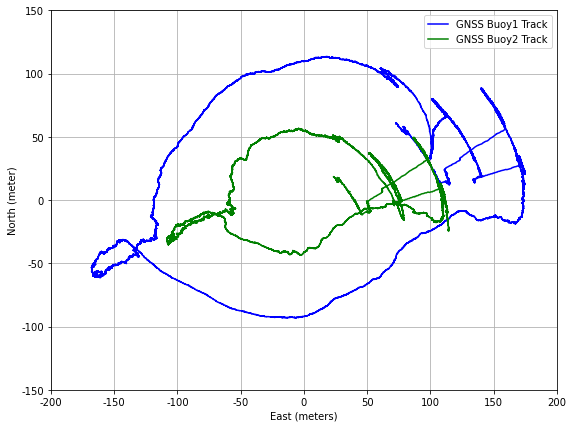

In [85]:
import matplotlib.pyplot as plt

# 提取 NEU 坐标中的 N 和 E 坐标
north_md, east_md = zip(*[(n, e) for n, e, _ in neu_data_md])
north_gh, east_gh = zip(*[(n, e) for n, e, _ in neu_data_gh])

# 绘制轨迹图
plt.figure(figsize=(8, 6))
plt.plot([e - 50 for e in east_md[3000:-3000]], [n - 150 for n in north_md[3000:-3000]], label="GNSS Buoy1 Track", color="blue", linestyle='-')
plt.plot([e - 50 for e in east_gh[3000:-3000]], [n - 150 for n in north_gh[3000:-3000]], label="GNSS Buoy2 Track", color="green", linestyle='-')

plt.xlabel("East (meters)")
plt.ylabel("North (meter)")
plt.grid(True)
plt.legend()
plt.tight_layout()


# Modify tick labels to include units
plt.yticks(ticks=plt.yticks()[0], labels=[f"{n:.0f}" for n in plt.yticks()[0]])
plt.xticks(ticks=plt.xticks()[0], labels=[f"{e:.0f}" for e in plt.xticks()[0]])

plt.savefig("./trajectories_time_adjusted_plot2.pdf", format="pdf")
plt.show()
